# Random Walk
## Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The simple random walk is one of the simplest numerical simulations. In a 2-dimensional random walk we assume that in each step the position will change with a random step in $ (\Delta x_i, \Delta y_i) $ direction. <br>
There are various ways to make these random steps. We use random function in Numpy library in the following notebook.

In [2]:
max_step = 100000       # Number of wanted random steps
x = np.zeros(max_step)  # Allocating array to store x position
y = np.zeros(max_step)  # Allocating array to store y position

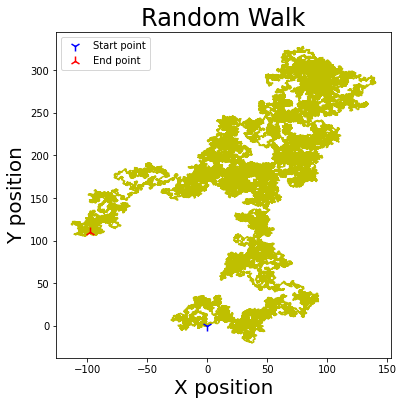

In [13]:
fig , ax = plt.subplots(1,1,figsize=(6,6))
ax.set_title("Random Walk" , size = 24)
for step in range(1,max_step):
    x[step] = x[step-1]+(np.random.random()-0.5)*2
    y[step] = y[step-1]+(np.random.random()-0.5)*2
ax.plot(x,y,color="y", zorder=1)
ax.scatter(x[0],y[0],marker='1', color = 'b', s=100, zorder=2 , label="Start point")
ax.scatter(x[-1],y[-1],marker='2', color = 'r' , s=100 , zorder=2, label="End point")
ax.set_ylabel("Y position" , size = 20)
ax.set_xlabel("X position" , size = 20)
ax.legend()

The distance from the starting point is $ R=\sqrt{(x_f-x_0)^2 + (y_f-y_0)^2} $.  <br>
Now we can plot $R$ as a function of $\sqrt{N}$, to check that whether it behaves like $ R \approx \sqrt{N}$. However, we should note that we have to average $ R $ for K number of trials for each $ N $.

In [15]:
K = 1000    # Number of trials for each N
R_temp = np.zeros(K)  # Allocating memory for storing R in each trials
N = np.linspace(10,1000,100)
Rs = np.zeros(len(N)) # Allocating memory for storing averaged R for K trials with N steps
index = 0  # index required for Rs array 
for n in N:
    for k in range(K):
        x = np.zeros(int(n))  # Allocating array to store x position
        y = np.zeros(int(n))  # Allocating array to store y position
        for step in range(1,int(n)):
            x[step] = x[step-1]+(np.random.random()-0.5)*2
            y[step] = y[step-1]+(np.random.random()-0.5)*2
        R_temp[k] = np.sqrt(x[-1]**2+y[-1]**2)
        del x,y
    Rs[index] = np.mean(R_temp)
    index += 1

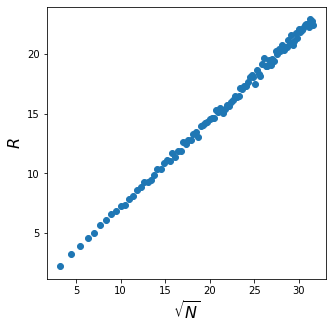

In [16]:
fig2, ax2 = plt.subplots(1,1,figsize=(5,5))
ax2.set_xlabel("$\sqrt{N}$", fontsize=16)
ax2.set_ylabel("$R$" , fontsize=16)
ax2.scatter(np.sqrt(N),Rs)

## Curve fitting

With the help of "curve_fit" function in scipy library, we can fit any defined function to our data and find the fitting parameters.

In [17]:
from scipy.optimize import curve_fit

Since we expect the behavior is linear, we try to fit a line with slope of "m" and y-intercept of "b".

In [18]:
def line(x,m,b):
    return m*x+b

Curve_fit returns an array of fitting parameters, in this case [m,b] and covariance of these parameters.

In [19]:
coeff, coeff_c = curve_fit(line,np.sqrt(N),Rs)
print("m = %.2f and b = %.2f" %(coeff[0], coeff[1]))

m = 0.73 and b = -0.10


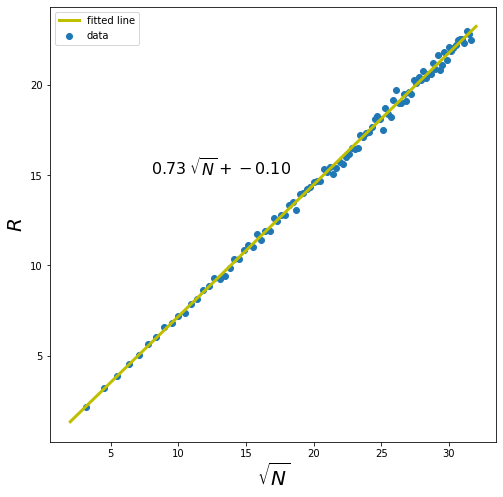

In [30]:
fig3, ax3 = plt.subplots(1,1,figsize=(8,8))
ax3.set_xlabel("$\sqrt{N}$", fontsize=20)
ax3.set_ylabel("$R$" , fontsize=20)
ax3.scatter(np.sqrt(N),Rs,label="data")
xx = np.linspace(2,32,100)
ax3.plot(xx, line(xx,*coeff), color="y", lw=3 , label="fitted line" )
ax3.text(8,15,"$%.2f \; \sqrt{N} + %.2f$" %(coeff[0],coeff[1]) , fontsize=16)
ax3.legend()

Not quite what we've expected but it is something :)